In [2]:
# data setup
from data import SCAN
import torch
import numpy as np

In [3]:
import matplotlib.pyplot as plt
import seaborn

%matplotlib inline

def draw(data, x, y, ax):
    colormap = seaborn.color_palette("Greens")
    seaborn.heatmap(data, 
                    xticklabels=x, square=True, yticklabels=y, vmin=0.0, vmax=1.0, 
                    cbar=True, cbar_kws={"shrink": 0.5}, cmap=colormap, ax=ax)

In [4]:
train_data = SCAN('mcd1', 'train', True, 'cpu', None)
SRC, TRG = train_data.get_vocab()

In [5]:
src_txt = [
    '<sos> jump right <eos>', 
    '<sos> look right <eos>', 
    '<sos> jump twice <eos>', 
    '<sos> walk twice <eos>', 
    '<sos> jump opposite left <eos>', 
    '<sos> walk opposite left <eos>',
    '<sos> jump around left <eos>', 
    '<sos> walk around left <eos>', 
    '<sos> turn around right and jump around right twice <eos>', 
    '<sos> turn around right and walk around right twice <eos>', 
    '<sos> jump opposite right twice after jump left twice <eos>', 
    '<sos> walk opposite right twice after walk left twice <eos>']
src_ann_txt = [
    '<sos> prim right <eos>', 
    '<sos> prim right <eos>', 
    '<sos> prim twice <eos>', 
    '<sos> prim twice <eos>', 
    '<sos> prim opposite left <eos>', 
    '<sos> prim opposite left <eos>',
    '<sos> prim around left <eos>', 
    '<sos> prim around left <eos>', 
    '<sos> turn around right and prim around right twice <eos>', 
    '<sos> turn around right and prim around right twice <eos>', 
    '<sos> prim opposite right twice after prim left twice <eos>', 
    '<sos> prim opposite right twice after prim left twice <eos>'
]

In [6]:
ss = []
ss_ann = []
for s, s_ann in zip(src_txt, src_ann_txt):
    ss.append(s.split())
    ss_ann.append(s_ann.split())

In [7]:
# For now, will have to do it sequentially, in pairs of two
src = []
src_ann = []
for s, s_ann in zip(src_txt, src_ann_txt):
    l = []
    m = []
    count = 0
    for w in s.split():
        l.append(SRC.get_stoi()[w])
        count += 1
    for v in s_ann.split():
        m.append(SRC.get_stoi()[v])
    while count < 10:
        l.append(1)
        m.append(1)
        count += 1
    src.append(l)
    src_ann.append(m)
src = torch.from_numpy(np.array(src, dtype=int))
src_ann = torch.from_numpy(np.array(src_ann, dtype=int))

In [8]:
trg_txt = [
    '<sos> I_TURN_RIGHT I_JUMP <eos>', 
    '<sos> I_TURN_RIGHT I_LOOK <eos>', 
    '<sos> I_JUMP I_JUMP <eos>', 
    '<sos> I_WALK I_WALK <eos>', 
    '<sos> I_TURN_LEFT I_TURN_LEFT I_JUMP <eos>', 
    '<sos> I_TURN_LEFT I_TURN_LEFT I_WALK <eos>', 
    '<sos> I_TURN_LEFT I_JUMP I_TURN_LEFT I_JUMP I_TURN_LEFT I_JUMP I_TURN_LEFT I_JUMP <eos>', 
    '<sos> I_TURN_LEFT I_WALK I_TURN_LEFT I_WALK I_TURN_LEFT I_WALK I_TURN_LEFT I_WALK <eos>', 
    '<sos> I_TURN_RIGHT I_TURN_RIGHT I_TURN_RIGHT I_TURN_RIGHT I_TURN_RIGHT I_JUMP I_TURN_RIGHT I_JUMP I_TURN_RIGHT I_JUMP I_TURN_RIGHT I_JUMP I_TURN_RIGHT I_JUMP I_TURN_RIGHT I_JUMP I_TURN_RIGHT I_JUMP I_TURN_RIGHT I_JUMP <eos>', 
    '<sos> I_TURN_RIGHT I_TURN_RIGHT I_TURN_RIGHT I_TURN_RIGHT I_TURN_RIGHT I_WALK I_TURN_RIGHT I_WALK I_TURN_RIGHT I_WALK I_TURN_RIGHT I_WALK I_TURN_RIGHT I_WALK I_TURN_RIGHT I_WALK I_TURN_RIGHT I_WALK I_TURN_RIGHT I_WALK <eos>', 
    '<sos> I_TURN_LEFT I_JUMP I_TURN_LEFT I_JUMP I_TURN_RIGHT I_TURN_RIGHT I_JUMP I_TURN_RIGHT I_TURN_RIGHT I_JUMP <eos>',
    '<sos> I_TURN_LEFT I_WALK I_TURN_LEFT I_WALK I_TURN_RIGHT I_TURN_RIGHT I_WALK I_TURN_RIGHT I_TURN_RIGHT I_WALK <eos>']
trg_ann_txt = [
    '<sos> I_TURN_RIGHT PRIM <eos>', 
    '<sos> I_TURN_RIGHT PRIM <eos>', 
    '<sos> PRIM PRIM <eos>', 
    '<sos> PRIM PRIM <eos>', 
    '<sos> I_TURN_LEFT I_TURN_LEFT PRIM <eos>', 
    '<sos> I_TURN_LEFT I_TURN_LEFT PRIM <eos>', 
    '<sos> I_TURN_LEFT PRIM I_TURN_LEFT PRIM I_TURN_LEFT PRIM I_TURN_LEFT PRIM <eos>', 
    '<sos> I_TURN_LEFT PRIM I_TURN_LEFT PRIM I_TURN_LEFT PRIM I_TURN_LEFT PRIM <eos>', 
    '<sos> I_TURN_RIGHT I_TURN_RIGHT I_TURN_RIGHT I_TURN_RIGHT I_TURN_RIGHT PRIM I_TURN_RIGHT PRIM I_TURN_RIGHT PRIM I_TURN_RIGHT PRIM I_TURN_RIGHT PRIM I_TURN_RIGHT PRIM I_TURN_RIGHT PRIM I_TURN_RIGHT PRIM <eos>', 
    '<sos> I_TURN_RIGHT I_TURN_RIGHT I_TURN_RIGHT I_TURN_RIGHT I_TURN_RIGHT PRIM I_TURN_RIGHT PRIM I_TURN_RIGHT PRIM I_TURN_RIGHT PRIM I_TURN_RIGHT PRIM I_TURN_RIGHT PRIM I_TURN_RIGHT PRIM I_TURN_RIGHT PRIM <eos>', 
    '<sos> I_TURN_LEFT PRIM I_TURN_LEFT PRIM I_TURN_RIGHT I_TURN_RIGHT PRIM I_TURN_RIGHT I_TURN_RIGHT PRIM <eos>',
    '<sos> I_TURN_LEFT PRIM I_TURN_LEFT PRIM I_TURN_RIGHT I_TURN_RIGHT PRIM I_TURN_RIGHT I_TURN_RIGHT PRIM <eos>'
]

In [9]:
tt = []
tt_ann = []
for t, t_ann in zip(trg_txt, trg_ann_txt):
    tt.append(t.split())
    tt_ann.append(t_ann.split())

In [10]:
# For now, will have to do it sequentially, in pairs of two
trg = []
trg_ann = []
for s, t in zip(trg_txt, trg_ann_txt):
    l = []
    m = []
    count = 0
    for w in s.split():
        l.append(TRG.get_stoi()[w.lower()])
        count += 1
    for v in t.split():
        m.append(TRG.get_stoi()[v.lower()])
    while count < 23:
        l.append(1)
        m.append(1)
        count += 1
    trg.append(l)
    trg_ann.append(m)
trg = torch.from_numpy(np.array(trg, dtype=int))
trg_ann = torch.from_numpy(np.array(trg_ann, dtype=int))

Sep-Transformer Failure Analysis

In [11]:
import pickle
with open('../results/sep-transformer/scan/mcd1/train_threshold_mcd1_attn_maps0.pickle', 'rb') as f:
    objs = []
    while 1:
        try:
            objs.append(pickle.load(f))
        except EOFError:
            break

In [12]:
enc_maps, dec_maps, source, examples, pred = objs[0]

In [13]:
sx = []
sx_txt = []
for s in source:
    prediction = ''
    for i in range(0, s.shape[0]):
        sym = SRC.get_itos()[s[i]]
        if sym == '<eos>': break
        prediction += sym + ' '
    prediction += '<eos>'
    sx.append(prediction.split())
    sx_txt.append(prediction)
    
wp = []
wp_txt = []
for s in pred:
    prediction = ''
    for i in range(0, s.shape[0]):
        sym = TRG.get_itos()[s[i]]
        if sym == '<eos>': break
        prediction += sym + ' '
    prediction += '<eos>'
    wp.append(prediction.split())
    wp_txt.append(prediction)
    
ex = []
ex_txt = []
for s in examples:
    prediction = ''
    for i in range(0, s.shape[0]):
        sym = TRG.get_itos()[s[i]]
        if sym == '<eos>': break
        prediction += sym + ' '
    prediction += '<eos>'
    ex.append(prediction.split())
    ex_txt.append(prediction)

Encoder Layer 1


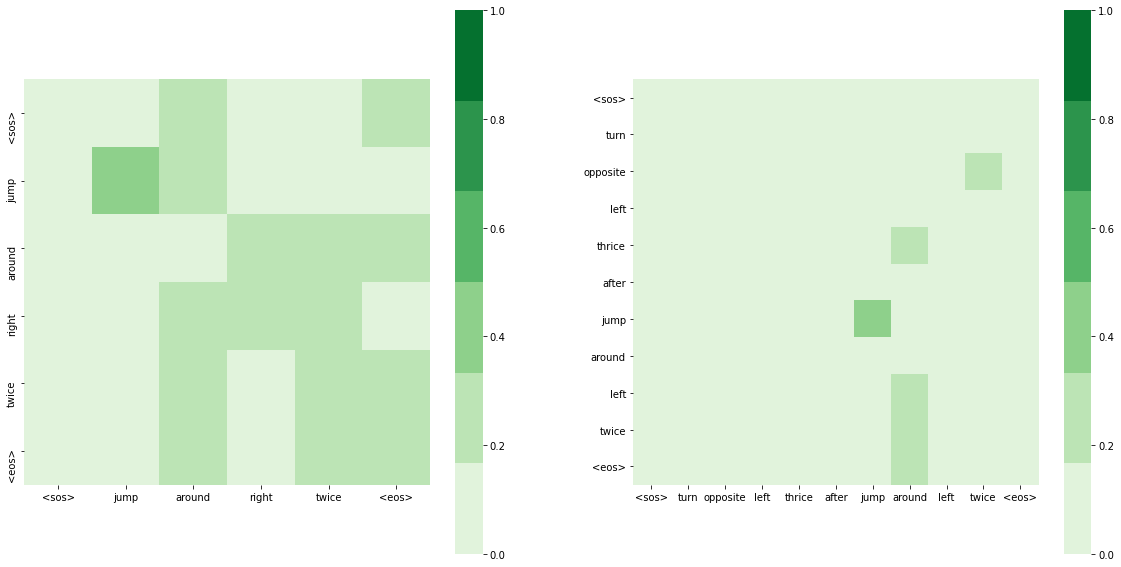

Encoder Layer 2


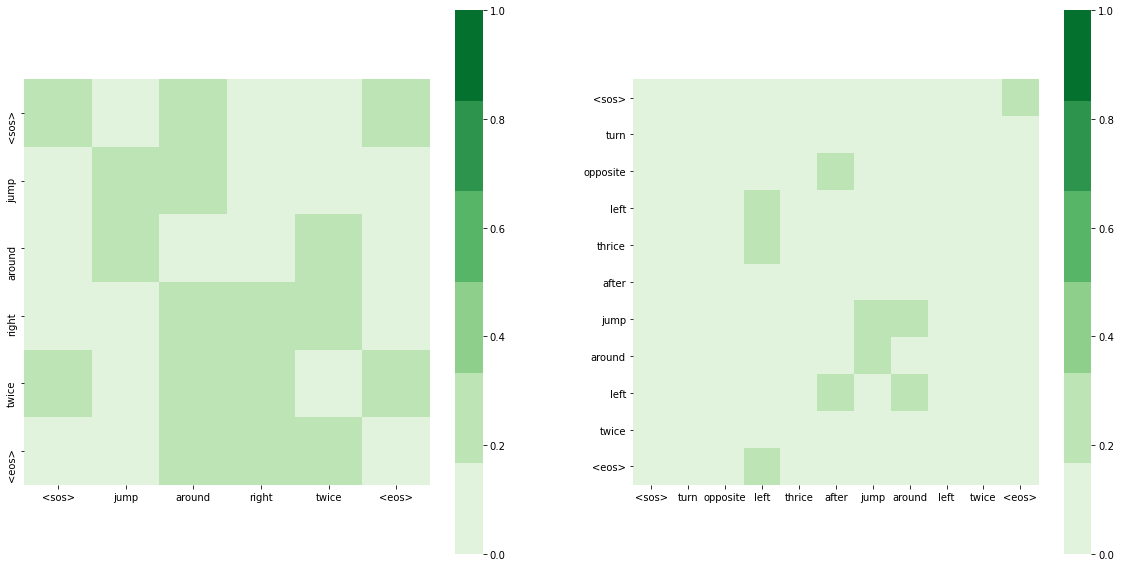

In [14]:
for layer in range(2):
    fig, axs = plt.subplots(1, 2, figsize=(20, 20))
    print(f"Encoder Layer {layer + 1}")
    for i in range(2):
        draw(torch.mean(enc_maps[layer][i].cpu(), axis=0)[:len(sx[i]), :len(sx[i])], sx[i], sx[i], ax=axs[i])
    plt.show()

Decoder Layer 1 Self Attention


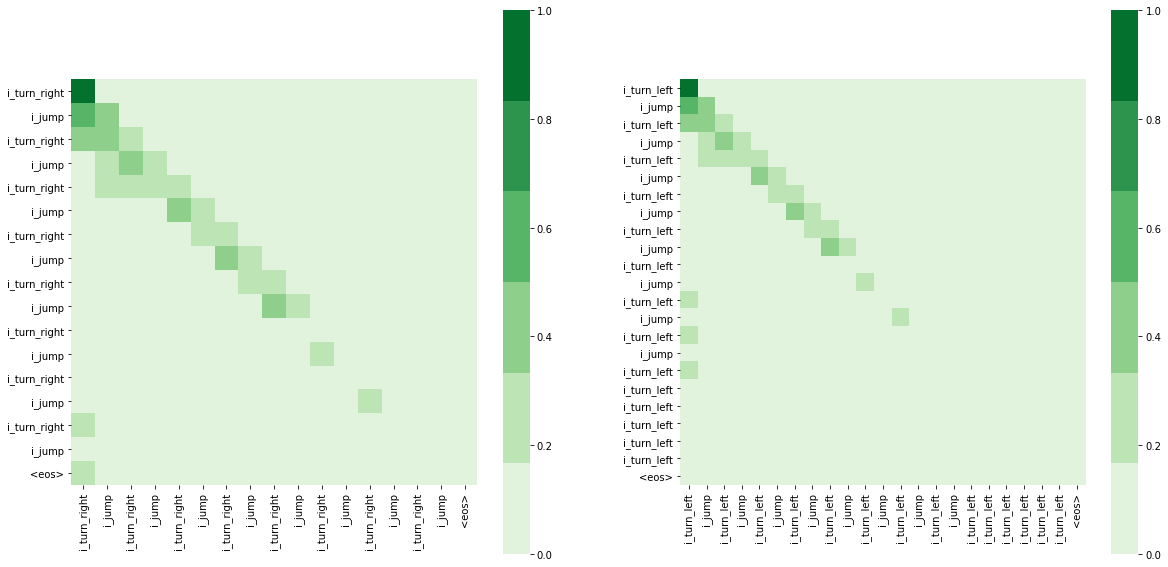

Decoder Layer 2 Self Attention


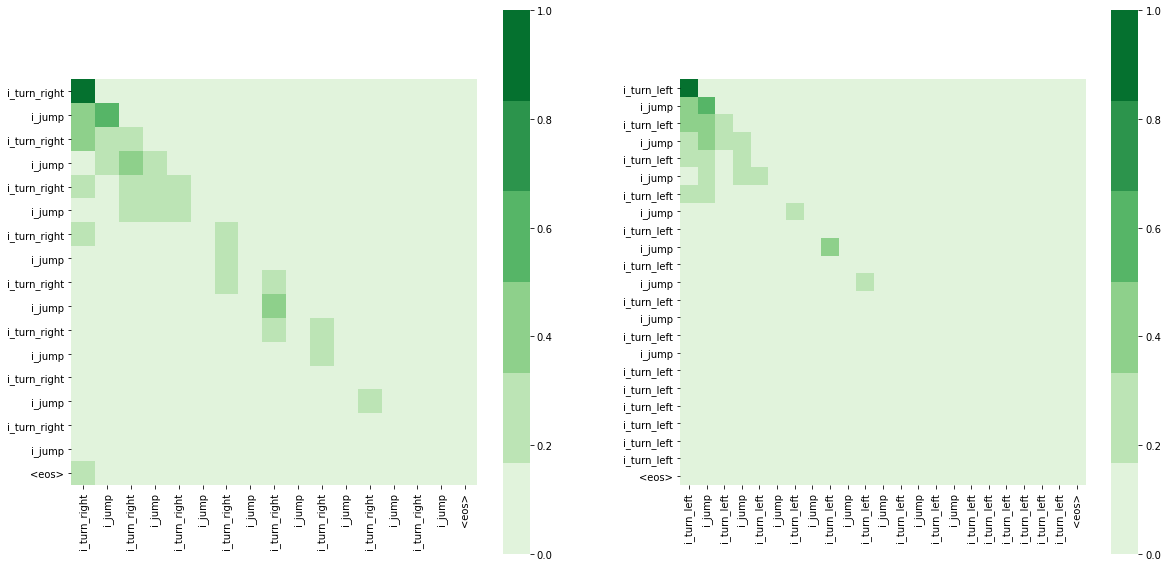

In [15]:
for layer in range(2):
    fig, axs = plt.subplots(1, 2, figsize=(20, 20))
    print(f'Decoder Layer {layer + 1} Self Attention')
    for i in range(2):
        draw(torch.mean(dec_maps[layer]['self'][i].cpu(), axis=0)[:len(ex[i]), :len(ex[i])], ex[i], ex[i], ax=axs[i])
    plt.show()

Decoder Layer 1 MHA


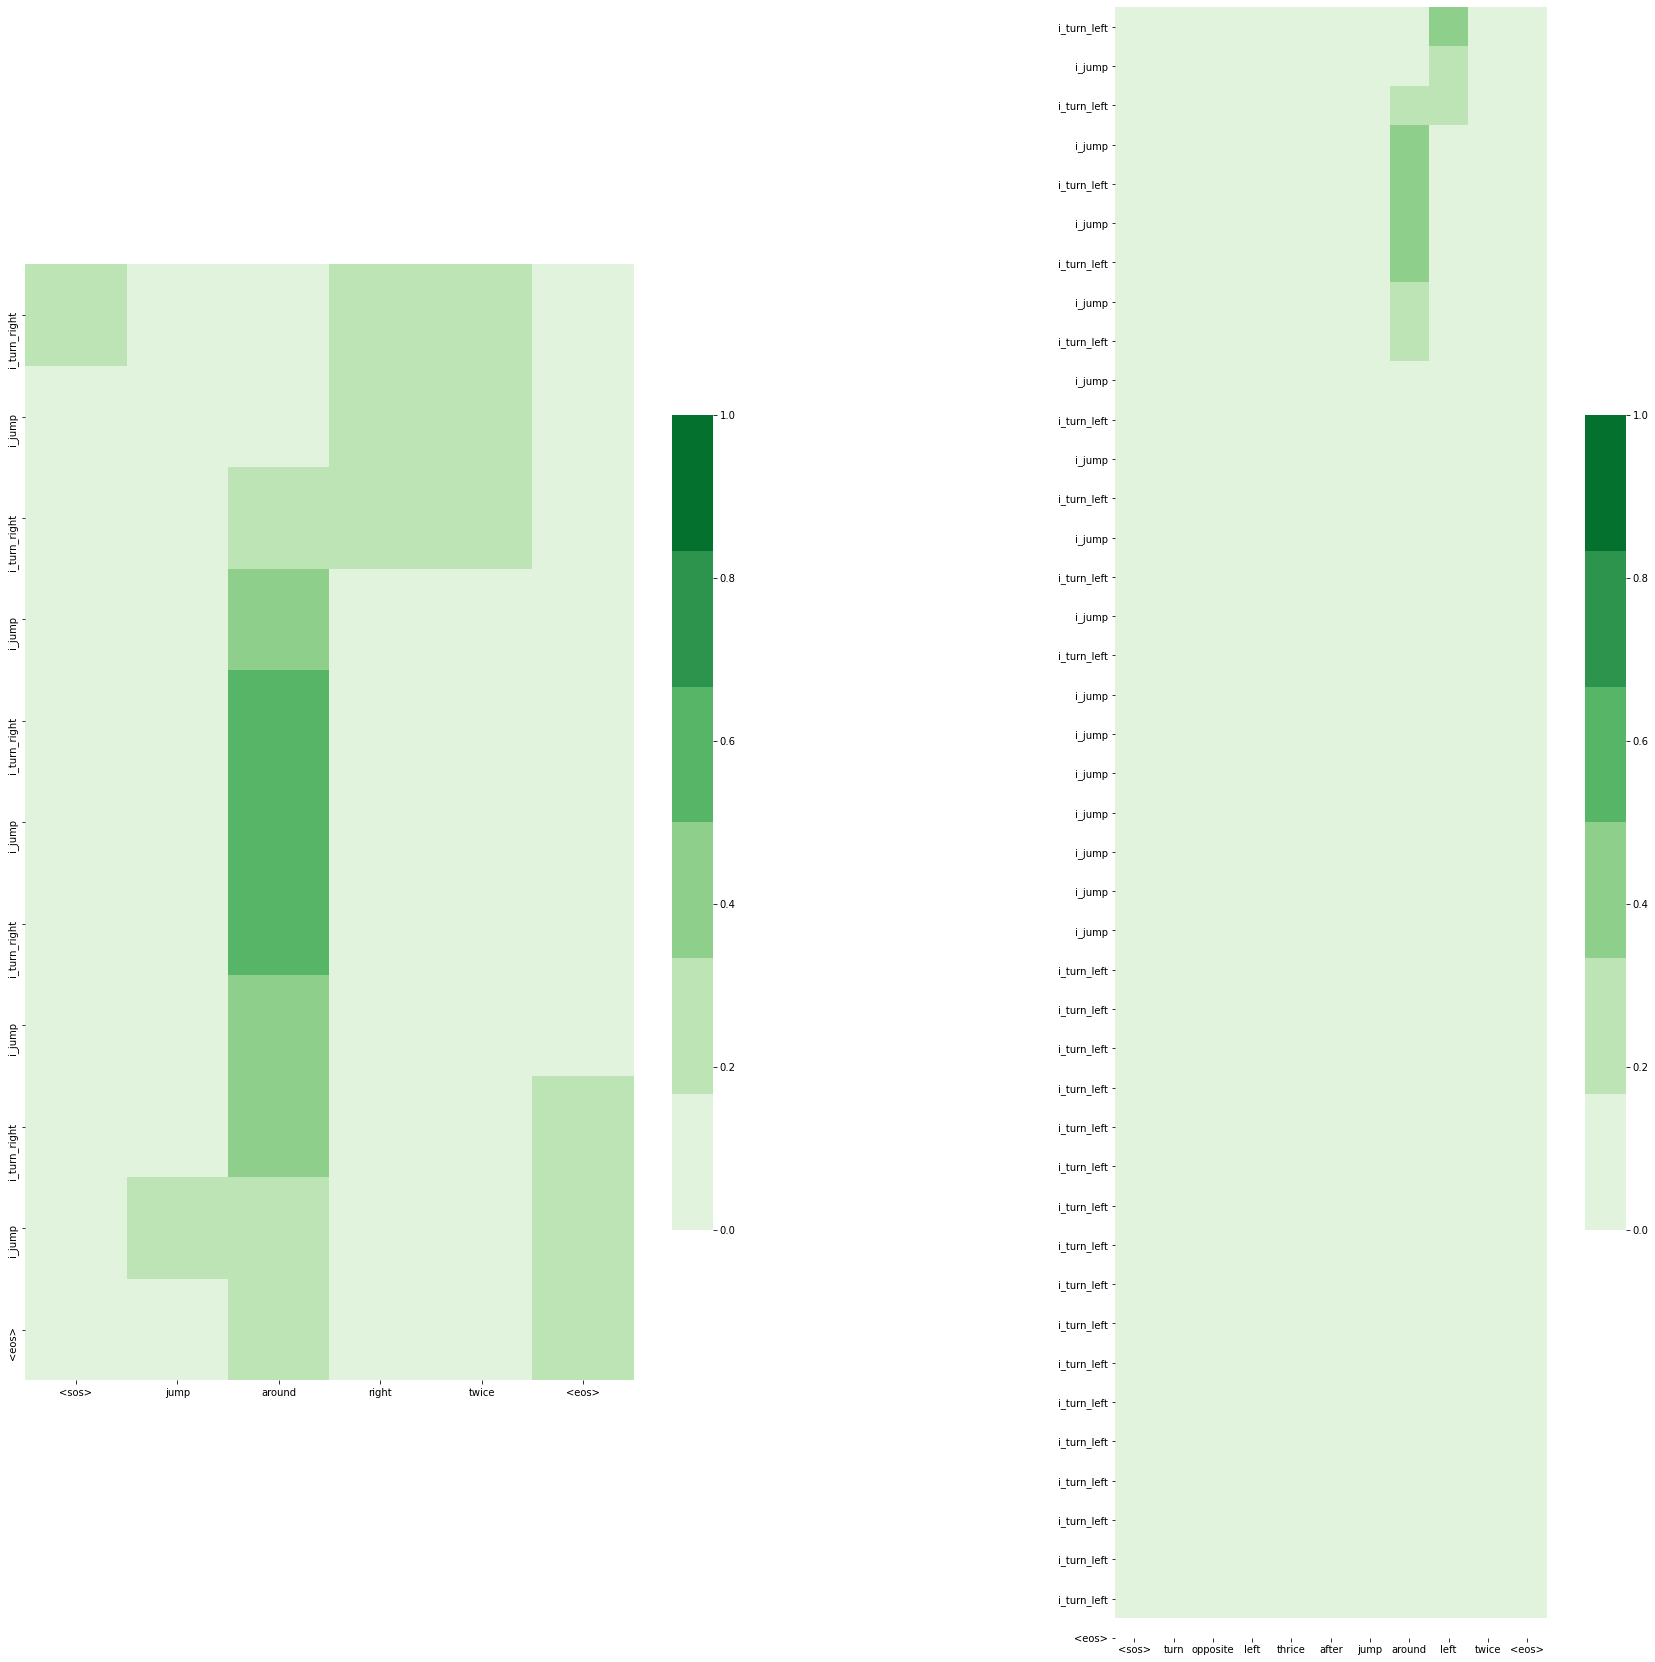

Decoder Layer 2 MHA


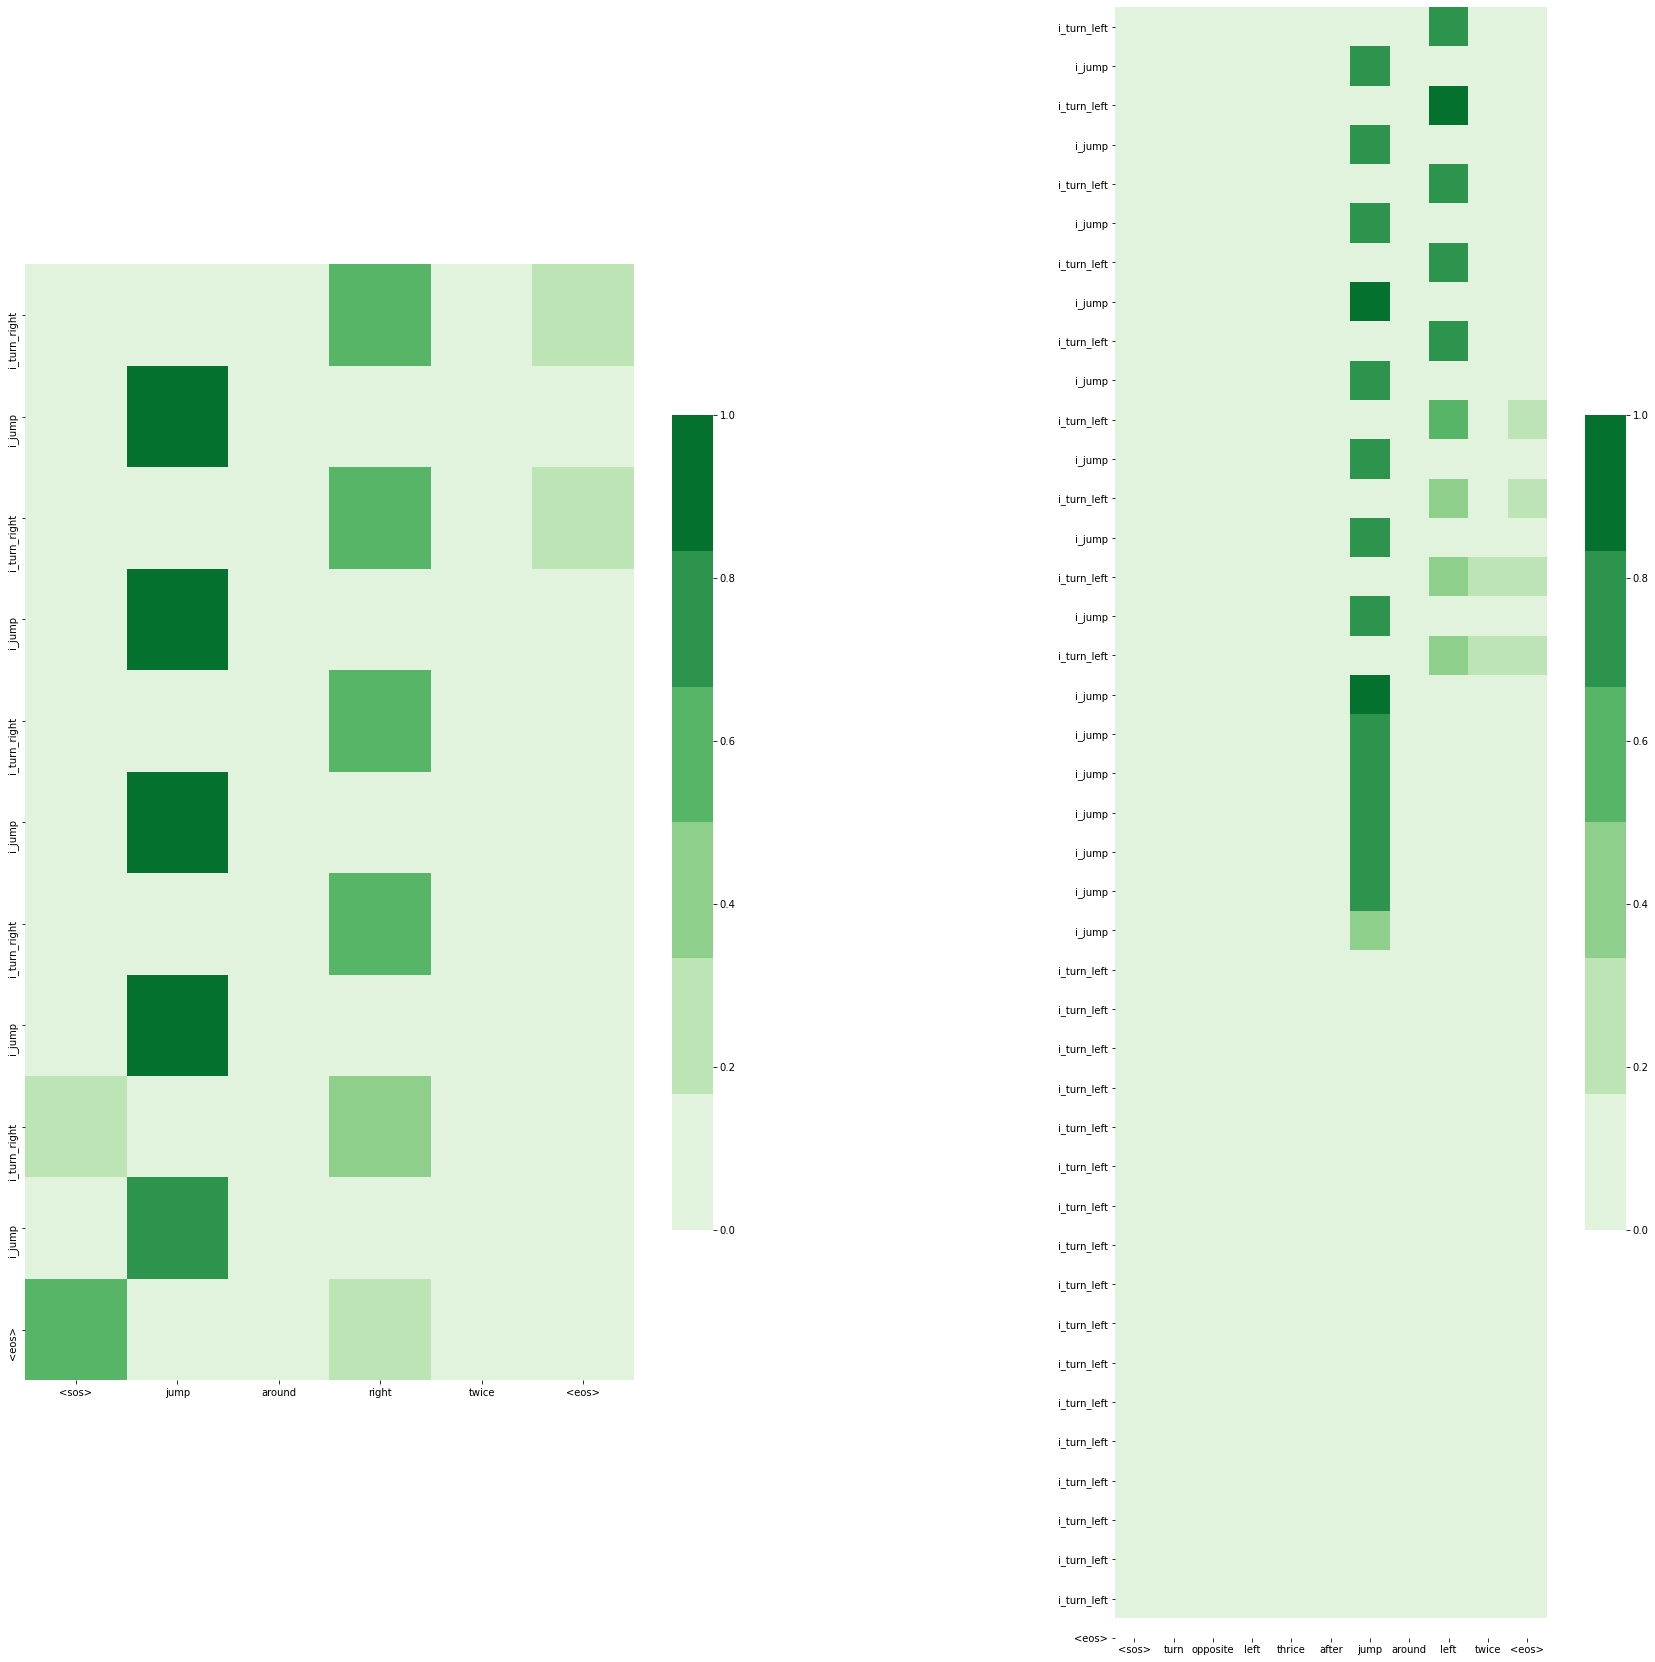

First wrong example, prediction
i_turn_right i_jump i_turn_right i_jump i_turn_right i_jump i_turn_right i_jump i_turn_right i_jump i_turn_right i_jump i_turn_right i_jump i_turn_right i_jump <eos> 	 i_turn_right i_jump i_turn_right i_jump i_turn_right i_jump i_turn_right i_jump i_turn_right i_jump <eos> 	 165 	 105
Second wrong example, prediction
i_turn_left i_jump i_turn_left i_jump i_turn_left i_jump i_turn_left i_jump i_turn_left i_jump i_turn_left i_jump i_turn_left i_jump i_turn_left i_jump i_turn_left i_turn_left i_turn_left i_turn_left i_turn_left i_turn_left <eos> 	 i_turn_left i_jump i_turn_left i_jump i_turn_left i_jump i_turn_left i_jump i_turn_left i_jump i_turn_left i_jump i_turn_left i_jump i_turn_left i_jump i_turn_left i_jump i_jump i_jump i_jump i_jump i_jump i_jump i_turn_left i_turn_left i_turn_left i_turn_left i_turn_left i_turn_left i_turn_left i_turn_left i_turn_left i_turn_left i_turn_left i_turn_left i_turn_left i_turn_left i_turn_left i_turn_left i_turn_left 

In [19]:
for layer in range(2):
    fig, axs = plt.subplots(1, 2, figsize=(30, 30))
    print(f'Decoder Layer {layer + 1} MHA')
    for i in range(2):
        draw(torch.mean(dec_maps[layer]['mha'][i].cpu(), axis=0)[:len(wp[i]), :len(sx[i])], sx[i], wp[i], ax=axs[i])
    plt.show()

print('First wrong example, prediction')
print(ex_txt[0], '\t', wp_txt[0], '\t', len(ex_txt[0]), '\t', len(wp_txt[0]))
print('Second wrong example, prediction')
print(ex_txt[1], '\t', wp_txt[1], '\t', len(ex_txt[1]), '\t', len(wp_txt[1]))